In [270]:
import pandas as pd
import numpy as np
from numpy import newaxis
import random
import itertools
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.collections
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from tqdm import *

import keras
from keras.applications import *
import lightgbm as lgbm
from scipy import stats
from keras.models import Sequential, Model
from keras.layers import * #Dense, Dropout, Activation, Flatten, Input,Concatenate, concatenate
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import cv2 as cv
from os import listdir
from os.path import isfile, join
from scipy import misc
from keras.optimizers import Adam
from sklearn import preprocessing
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
plt.ion()
plt.show()

In [5]:
basedir = 'data/dogs-train/'
files = [f for f in listdir(basedir) if isfile(join(basedir, f))]
print(len(files))
files[0]

10222


'000bec180eb18c7604dcecc8fe0dba07.jpg'

In [8]:
labels = pd.read_csv('data/labels.csv')
print(labels.shape)
labels.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119]), <a list of 120 Text xticklabel objects>)

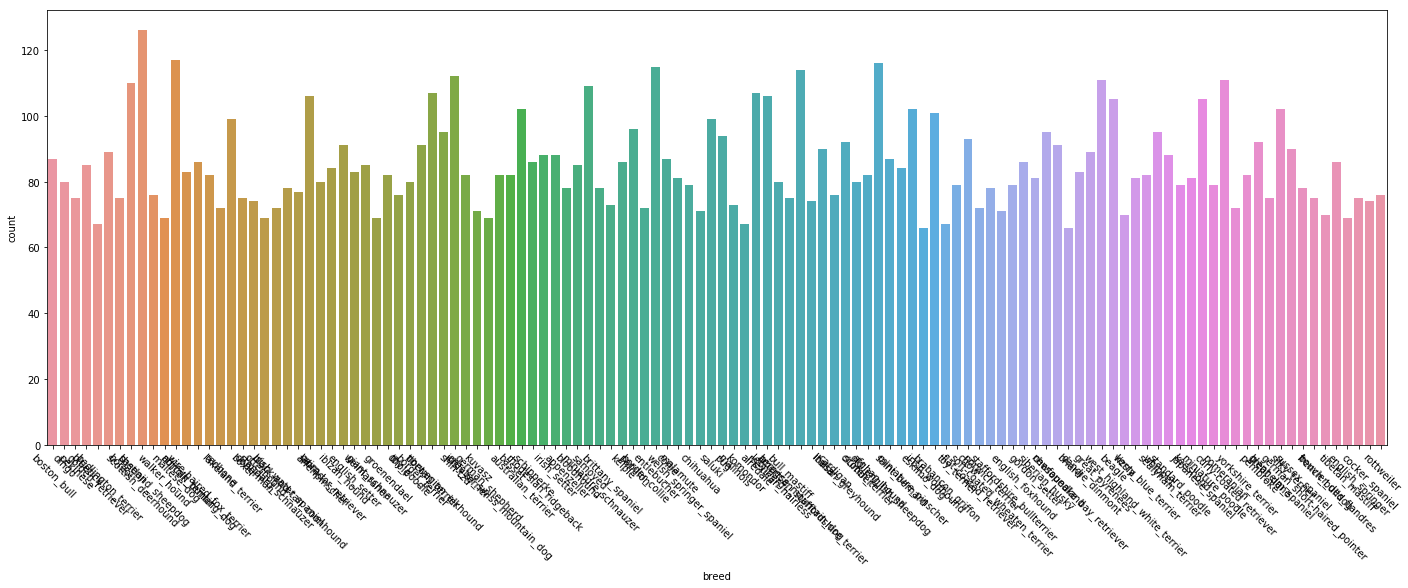

In [46]:
plt.figure(figsize=(24, 8))
sns.countplot(x='breed', data = labels)
plt.xticks(rotation=-45)

In [53]:
breeds = labels.breed.unique()
print(len(breeds))
breeds

120


array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog', 'wire-haired_fox_terrier',
       'redbone', 'lakeland_terrier', 'boxer', 'doberman', 'otterhound',
       'standard_schnauzer', 'irish_water_spaniel',
       'black-and-tan_coonhound', 'cairn', 'affenpinscher',
       'labrador_retriever', 'ibizan_hound', 'english_setter',
       'weimaraner', 'giant_schnauzer', 'groenendael', 'dhole',
       'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'borde

In [74]:
le = preprocessing.LabelEncoder()
le.fit(labels.breed.unique())
print(list(le.classes_)[:10])
print(le.inverse_transform([1]))
labels['y'] = le.transform(labels.breed) 
labels.head()

['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale', 'american_staffordshire_terrier', 'appenzeller', 'australian_terrier', 'basenji', 'basset', 'beagle']
['afghan_hound']


,id,breed,y
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,19
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,37
2,001cdf01b096e06d78e9e5112d419397,pekinese,85
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,15
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,49


In [69]:
le.transform(labels.breed[:3]) 

array([19, 37, 85], dtype=int64)

In [79]:
y_train = to_categorical(labels['y'].values)
y_train.shape

(10222, 120)

In [90]:
def y_test_to_labels(y_test):
    inverted = np.apply_along_axis(np.argmax, 1, y_test)
    return le.inverse_transform(inverted)
y_test_to_labels(y_train[:2])

array(['boston_bull', 'dingo'], dtype=object)

In [58]:
onehot_encoder = preprocessing.OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded.shape)
print(onehot_encoded)

(120, 120)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [60]:
inverted = label_encoder.inverse_transform([np.argmax(onehot_encoded[0, :])])
print(inverted)

['boston_bull']


In [27]:
img_size = 240
def normalize(arr):
    arr=arr.astype('float32')
    if arr.max() > 1.0:
        arr/=255.0
    return arr

def resizeImg(Xg):
#     cv.normalize(Xg,  Xg, 0, 1, cv.NORM_MINMAX)
#     Xg/=255.0
    Xg = normalize(Xg)
    if Xg.shape[0] >= 224:
        return cv.resize(Xg,(img_size,img_size), cv.INTER_AREA)
    else:
        return cv.resize(Xg,(img_size,img_size), cv.INTER_CUBIC)

    
def readAndResize(filename):
    dog = misc.imread(basedir + filename)
    return resizeImg(dog)

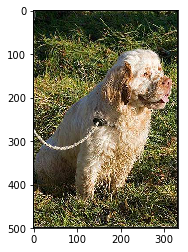

(500, 333, 3)


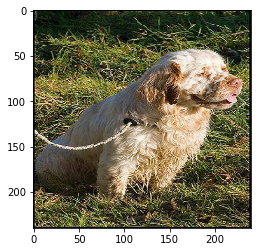

In [28]:
random_id= random.randint(0, len(files))
dog = misc.imread(basedir + files[random_id])
plt.imshow(dog)
plt.show()
print(dog.shape)

plt.imshow(resizeImg(dog))
plt.show()

In [108]:
y_train.shape


(10222, 120)

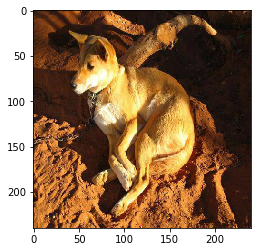

In [106]:
def getInputImages(df_ids):
    file_ids = labels[labels.index.isin(df_ids)]['id'].values
    data = [readAndResize(i+ '.jpg') for i in  file_ids]
    data = np.stack(data)
    return data

plt.imshow(getInputImages([1, 2, 4, 7])[0])

In [109]:
def getOutput(df_ids):
    output = [y_train[i] for i in df_ids]
    output = np.stack(output)
    return output
getOutput([0,1])   

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,

In [212]:
ids = []
def getData(size):
    idx = list(random.sample(range(len(files)), size))
    global ids
    ids = idx
    return getInputImages(idx), getOutput(idx)


In [29]:
img_rows = img_size
img_cols = img_size
channels = 3
img_shape = (img_rows, img_cols, channels)
epochs = 100
batch_size = 20
save_interval= 10
half_batch = int(batch_size / 2)


<IPython.core.display.Javascript object>


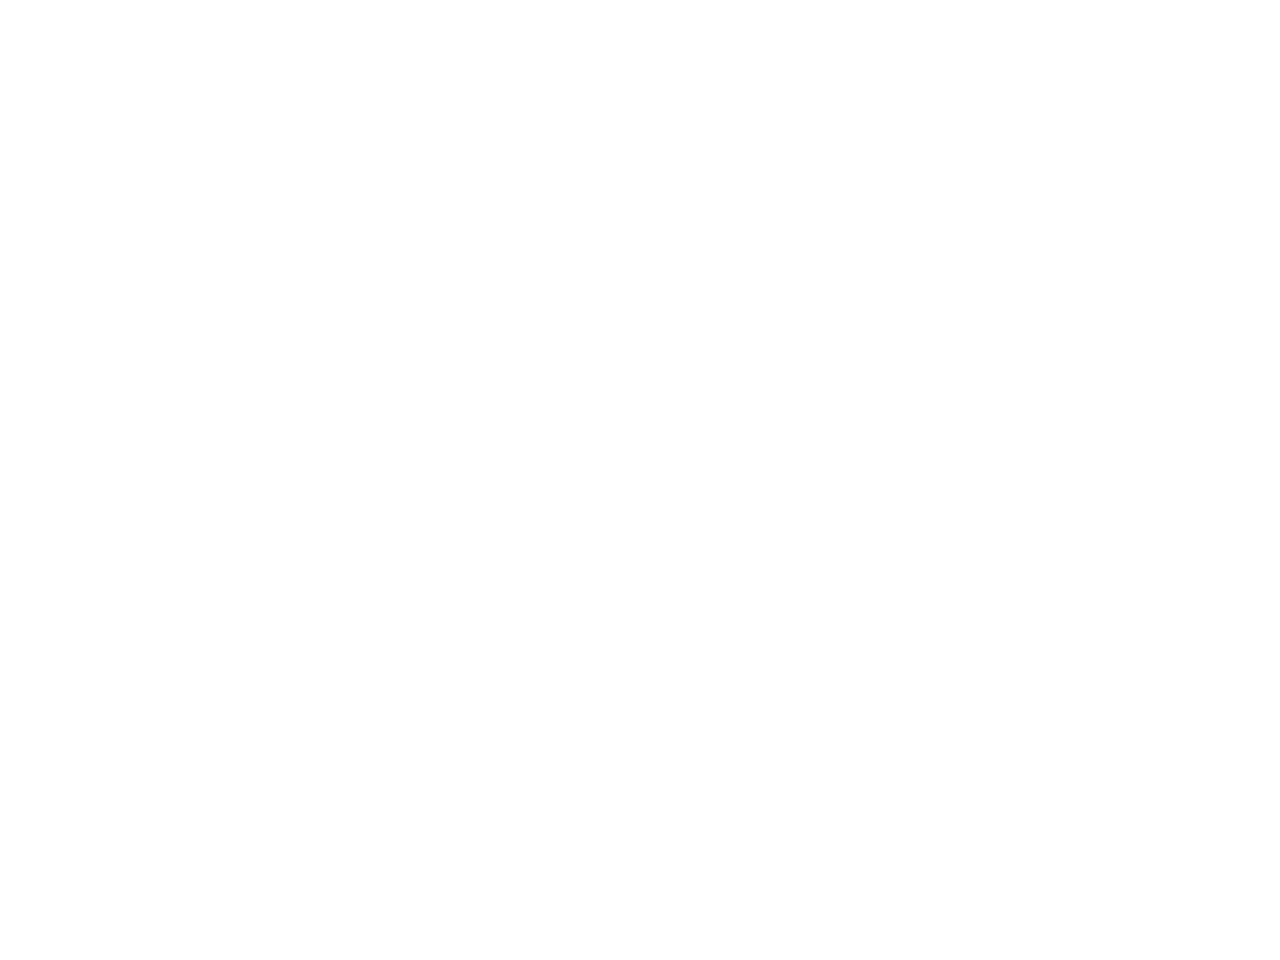

<IPython.core.display.Javascript object>


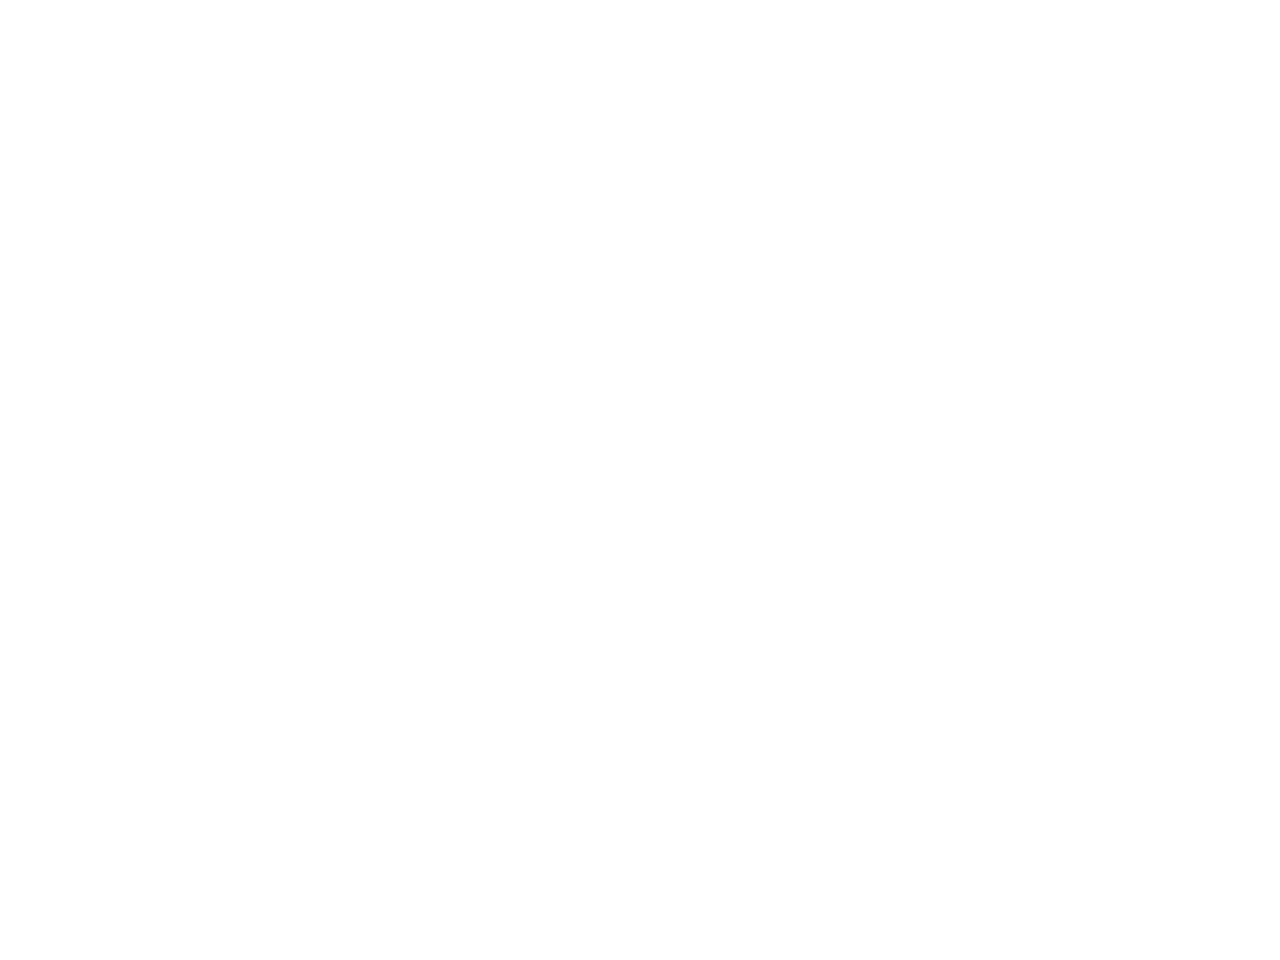

1

In [348]:
from IPython.display import clear_output

class PlotLosses(keras.callbacks.Callback):
    def __init__(self):
        self.initVars()
    
    def initVars(self):
        self.i = 0
        self.x = []
        self.losses = []
        self.acc = [] #
        self.fig = plt.figure()
        self.logs = []
        self.lr = []

    def on_epoch_end(self, epoch, logs={}):     
        self.i += 1

        if self.i% 5 != 0:
            return
        
        self.losses.append(logs.get('loss'))

        self.acc.append(logs.get('acc'))
        self.logs.append(logs)
        self.x.append(self.i)
        
        clear_output(wait=True)
        fig = plt.figure(accFig.number)
        plt.clf()
        ax = fig.add_subplot(1,1,1)
        ax.plot(self.x, self.losses, label="train loss")
        ax.plot(self.x, self.acc, label="accuracy")
        plt.axhline(0, color='grey', alpha=0.3, linewidth=1, linestyle = 'dashed')
        plt.axhline(1, color='grey', alpha=0.3, linewidth=1, linestyle = 'dashed')
        ax.legend()
        plt.show()
        accFig.canvas.draw() # this performs the actual drawing

        
myPlot = PlotLosses()
myPlot.initVars()
1

In [338]:
def create_model():
    img_shape = (img_rows, img_cols, channels)
    input_img = Input(shape=img_shape)
    
    x = Convolution2D(32, (5, 5), activation='relu', padding='same', input_shape=img_shape)(input_img)
    x = MaxPooling2D(pool_size=(2,2), padding='same') (x)
    x = LeakyReLU(0.2) (x)
    
    x = Convolution2D(64, (4, 4), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2,2), padding='same') (x)
    x = LeakyReLU(0.2) (x)
    
    x = Convolution2D(128, (3, 3),  activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2,2), padding='same') (x)
    x = LeakyReLU(0.2) (x)
    x = Dropout(0.6)(x)
    
    x = Convolution2D(256, (3, 3),  activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2,2), padding='same') (x)
    x = LeakyReLU(0.2) (x)
    x = Dropout(0.6)(x)
    
    x = Convolution2D(512, (3, 3),  activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2,2), padding='same') (x)
    x = LeakyReLU(0.2) (x)
    x = Dropout(0.6)(x)

    x = Flatten(input_shape=img_shape)(x)
    x = Dense(512)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dense(256)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dense(120, activation='softmax')(x)

    model = Model(input_img, x)

#     model.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy', metrics=['accuracy'])
#categorical_accuracy
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#     model.compile(optimizer=Adam(0.0001, 0.3), loss='categorical_crossentropy', metrics=['accuracy'])
    

    model.summary()
    return model

model = create_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 240, 240, 3)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 240, 240, 32)      2432      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 120, 120, 32)      0         
_________________________________________________________________
leaky_re_lu_32 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 120, 120, 64)      32832     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 60, 60, 64)        0         
_________________________________________________________________
leaky_re_lu_33 (LeakyReLU)   (None, 60, 60, 64)        0         
__________

In [321]:
def printPrediction(pred, output, inp):
    fig = plt.figure(predFig.number) # this links the plot to the figure
    plt.clf()
    grid = ImageGrid(fig, 111, nrows_ncols=(2, 3), axes_pad=0.05)
    pred = y_test_to_labels(pred)
    output = y_test_to_labels(output)
    for i in range(len(inp)):
#         ax = fig.add_subplot(3,2,i + 1)
        ax = grid[i]
        ax.imshow(inp[i])
        ax.text(8, 180, 'Predicted : %s ' % (pred[i]) , color='w', backgroundcolor='r', alpha=0.9)
        ax.text(8, 200, 'True value :  %s ' % (output[i]) , color='w', backgroundcolor='g', alpha=0.9)
        ax.axis('off')
    print('printing predictions : ', pred, output)
    plt.show()
    
    





In [319]:
d_input, d_output = getData(6)
pred = y_train[:6]
printPrediction(pred, d_output, d_input)

printing predictions


In [245]:
%matplotlib notebook

<IPython.core.display.Javascript object>


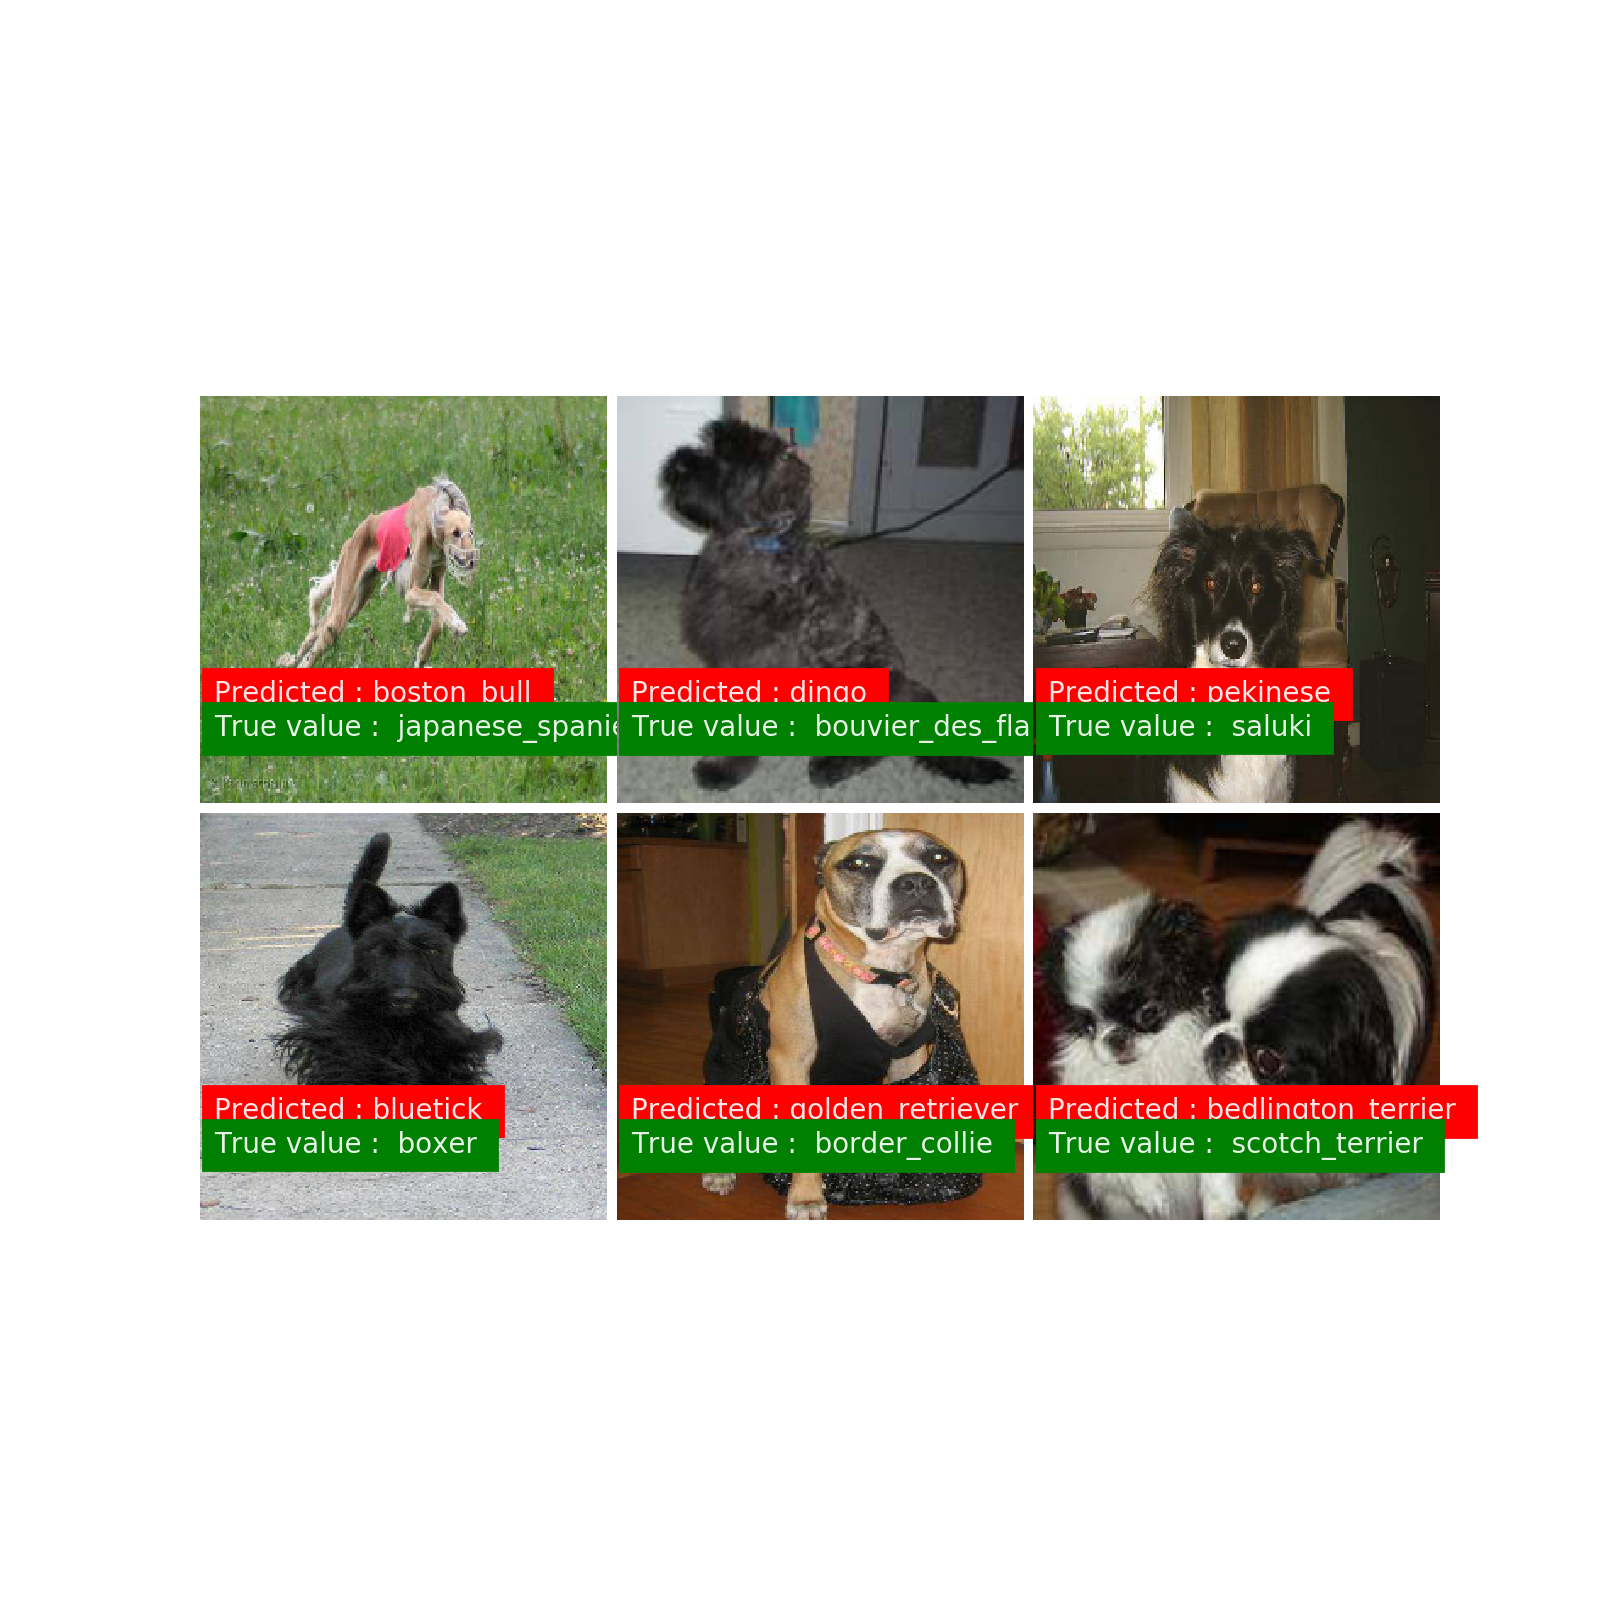

In [342]:
predFig = plt.figure(figsize=(8,8)) # figure reference has to be passed by plt.figure to cell above
predFig.clf()

<IPython.core.display.Javascript object>


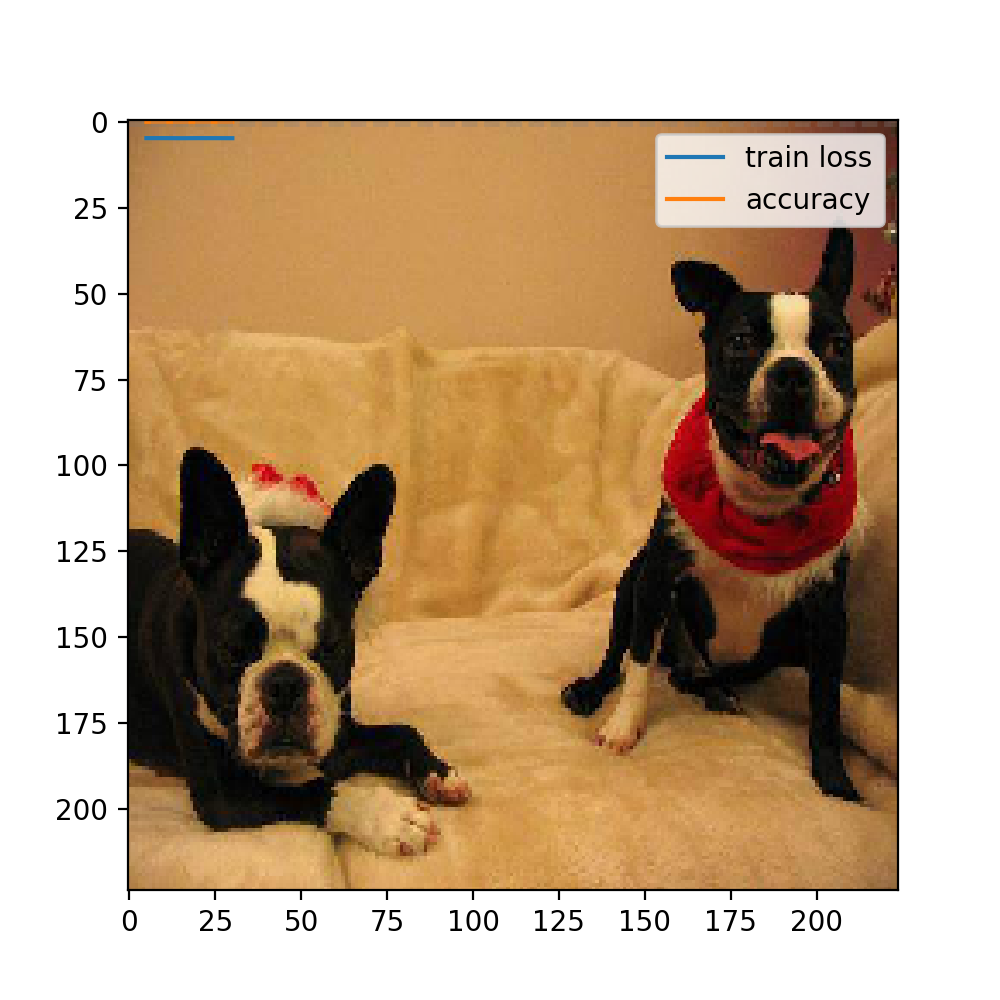

In [341]:
accFig = plt.figure(figsize=(5,5)) # figure reference has to be passed by plt.figure to cell above
accFig.clf()

In [349]:
batch_size = 30
epochs = 5
save_interval= 8
for epoch in range(10000):

    d_input, d_output = getData(batch_size)
    h= model.fit(d_input, d_output, epochs = epochs, callbacks=[myPlot], verbose=1, 
                 batch_size = batch_size)
#     print('history : ', h.history)
    
    if epoch % save_interval == 0:
        d_input, d_output = getData(6)
        pred = y_train[:6]
        printPrediction(pred, d_output, d_input)
        predFig.canvas.draw() #this activates actual drawing
        print('accuracy_score : ' , accuracy_score(pred.argmax(axis=1), d_output.argmax(axis=1)))

30/30 [==============================] - 13s - loss: 4.7887 - acc: 0.0000e+00
Epoch 1/5
30/30 [==============================] - 13s - loss: 4.7687 - acc: 0.0333
Epoch 2/5
30/30 [==============================] - 13s - loss: 4.7681 - acc: 0.0333
Epoch 3/5
30/30 [==============================] - 12s - loss: 4.7669 - acc: 0.0333
Epoch 4/5


KeyboardInterrupt: 

In [120]:
accuracy_score(getOutput([1, 0]), getOutput([0, 0]))

0.5

In [180]:
labels.isnull().sum(axis=0)

id       0
breed    0
y        0
dtype: int64

## Transfer learning


https://keras.io/applications/

In [353]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')




Predicted: [('n02091831', 'Saluki', 0.99967468), ('n02091134', 'whippet', 0.00014219858), ('n02088094', 'Afghan_hound', 9.5313684e-05)]


Predicted: [('n02112137', 'chow', 0.26687744), ('n02113799', 'standard_poodle', 0.24960907), ('n02132136', 'brown_bear', 0.088412397)]


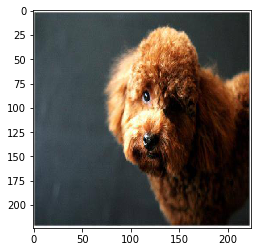

In [357]:
%matplotlib inline
random_id= random.randint(0, len(files))

img_path = basedir + files[random_id]
img = image.load_img(img_path, target_size=(224, 224))

plt.imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

In [358]:
from keras.layers import *
from keras.models import *
from keras.applications import *
from keras.optimizers import *
from keras.regularizers import *
from keras.applications.inception_v3 import preprocess_input

In [361]:
width = 240
n = len(files)
n_class = len(breeds)

In [363]:
X = np.zeros((n, width, width, 3), dtype=np.uint8)
y = np.zeros((n, n_class), dtype=np.uint8)


(10222, 120)

In [365]:
X = getInputImages(list(range(n)))

In [366]:
X.shape

(10222, 240, 240, 3)

In [360]:
def get_features(MODEL, data):
    cnn_model = MODEL(include_top=False, input_shape=(width, width, 3), weights='imagenet')
    
    inputs = Input((width, width, 3))
    x = inputs
    x = Lambda(preprocess_input, name='preprocessing')(x)
    x = cnn_model(x)
    x = GlobalAveragePooling2D()(x)
    cnn_model = Model(inputs, x)

    features = cnn_model.predict(data, batch_size=64, verbose=1)
    return features

In [367]:
inception_features = get_features(InceptionV3, X)
xception_features = get_features(Xception, X)
features = np.concatenate([inception_features, xception_features], axis=-1)

10222/10222 [==============================]===>.] - ETA: 1157 - ETA: 761 - ETA: 48 - ETA: 34 - ETA: 25 - ETA: 25 - ETA: 22 - ETA: 22 - ETA: 19 - ETA: 14 - ETA: 14 - ETA: 11 - ETA: 11 - ETA: 97s - ETA: 86 - ETA: 79 - ETA: 73 - ETA: 68 - ETA: 64 - ETA: 61 - ETA: 58 - ETA: 56 - ETA: 54 - ETA: 52 - ETA: 50 - ETA: 49 - ETA: 60 - ETA: 53 - ETA: 52 - ETA: 51 - ETA: 50 - ETA: 49 - ETA: 48 - ETA: 53 - ETA: 50 - ETA: 47 - ETA: 41 - ETA: 41 - ETA: 40 - ETA: 40 - ETA: 39 - ETA: 43 - ETA: 40 - ETA: 43 - ETA: 36 - ETA: 36 - ETA: 36 - ETA: 36 - ETA: 36 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 32 - ETA: 32 - ETA: 33 - ETA: 31 - ETA: 32 - ETA: 31 - ETA: 31 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 28 - ETA: 29 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA

In [368]:
features.shape

(10222, 4096)

In [376]:
np.save('data/inception_features.npy', inception_features)
np.save('data/xception_features.npy', xception_features)

In [374]:
np.save('data/features.npy', features)

In [375]:
f = np.load('data/features.npy')
f.shape



(10222, 4096)

In [ ]:
%matplotlib notebook
accFig = plt.figure(figsize=(5,5)) # figure reference has to be passed by plt.figure to cell above
accFig.clf()

In [ ]:
inputs = Input(features.shape[1:])
x = inputs
x = Dropout(0.5)(x)
x = Dense(n_class, activation='softmax')(x)
model = Model(inputs, x)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
h = model.fit(features, y, batch_size=128, epochs=10, validation_split=0.1, callbacks=[myPlot])

https://www.kernix.com/blog/image-classification-with-a-pre-trained-deep-neural-network_p11
https://www.tensorflow.org/tutorials/image_retraining
https://flyyufelix.github.io/2016/10/08/fine-tuning-in-keras-part2.html